In [22]:
import torch
import torch.nn as nn
# from openmmtorch import TorchForce
import os

import yaml
from pathlib import Path


import numpy as np
from openmm.app import *
from openmm import *
from openmm.unit import *


from sys import stdout

from simutils import ForceReporter, ForceModelConvert
from maputils import EquiValReporter

import training_modules as tm

from traj_reporter import TrajectoryReporter

from torch.optim import Adam
from torch.nn import MSELoss, L1Loss
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import Dataset , DataLoader
from training_utils import CGDataset , TrainSystem


In [23]:
import os
import yaml
import numpy as np
from pathlib import Path
from cgmap.utils import DataDict
from cgmap.mapping import Mapper

from typing import Dict

from aggforce import linearmap as lm
from aggforce import agg as ag
from aggforce import constfinder as cf

In [24]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

# Assign directory
input_directory = 'StartingStructures'

output_directory = '../datasets/NoPBCChiignolinVoid'

In [25]:




# Iterate over files in directory
for name in os.listdir(input_directory):
        file = os.path.join(input_directory, name)
        print(file)
        pdb = PDBFile(file)

        forcefield = ForceField('amber14-all.xml', 'amber14/tip3pfb.xml')
        system = forcefield.createSystem(pdb.topology, nonbondedMethod=NoCutoff,
                 constraints=HBonds)
        
        integrator = VerletIntegrator( 0.002*picoseconds)  #310*kelvin, 1/picosecond,
        simulation = Simulation(pdb.topology, system, integrator)
        simulation.context.setPositions(pdb.positions)
        simulation.minimizeEnergy()
        print(system.usesPeriodicBoundaryConditions())
        simulation.reporters.append(PDBReporter(output_directory + '/'+ name.split('.')[0] + '.pdb' , 500))
        # simulation.reporters.append(XTCReporter('../datasets/VacumeSims/testoutput.xtc', 50, append=False))
        simulation.reporters.append(TrajectoryReporter(output_directory + '/'+ name.split('.')[0] + '.dat', 500, step=True, potentialEnergy=True,
                kineticEnergy=True, temperature=True, time=True, totalEnergy=True))
        simulation.reporters.append(ForceReporter(output_directory + '/'+ name.split('.')[0] + '.txt', 500))
        # simulation.minimizeEnergy()
        simulation.step(5000000)
        forces = simulation.reporters[2].getForces()
        state = simulation.context.getState(getPositions=True, getEnergy=True, getForces=True)
        trrreport = simulation.reporters[1]
        trrreport.dump(output_directory + '/'+ name.split('.')[0] + '.pdb', output_directory + '/'+ name.split('.')[0] + '.trr')
        print(name + 'done')
        


StartingStructures/chignolin_frames0.pdb
False
chignolin_frames0.pdbdone
StartingStructures/chignolin_frames1.pdb
False
chignolin_frames1.pdbdone
StartingStructures/chignolin_frames2.pdb
False
chignolin_frames2.pdbdone
StartingStructures/chignolin_frames3.pdb
False
chignolin_frames3.pdbdone
StartingStructures/chignolin_frames4.pdb
False
chignolin_frames4.pdbdone
StartingStructures/chignolin_frames5.pdb
False
chignolin_frames5.pdbdone
StartingStructures/chignolin_frames6.pdb
False
chignolin_frames6.pdbdone
StartingStructures/chignolin_frames7.pdb
False
chignolin_frames7.pdbdone
StartingStructures/chignolin_frames8.pdb
False
chignolin_frames8.pdbdone
StartingStructures/chignolin_frames9.pdb
False
chignolin_frames9.pdbdone
StartingStructures/chignolin_frames10.pdb
False
chignolin_frames10.pdbdone
StartingStructures/chignolin_frames11.pdb
False
chignolin_frames11.pdbdone
StartingStructures/chignolin_frames12.pdb
False
chignolin_frames12.pdbdone
StartingStructures/chignolin_frames13.pdb
Fal

In [8]:
simulation.reporters[2].getForces().max()


1331.5400488237271

In [9]:
np.linalg.norm(dataset['bead_forces'],axis=0).max()

NameError: name 'dataset' is not defined

In [6]:
trj_list = []

for name in os.listdir(output_directory):
    if name.endswith(".trr"):
        trj_list.append(output_directory + '/' + name)

print(trj_list)

['../datasets/NoPBCChiignolinVoid/chignolin_frames0.trr', '../datasets/NoPBCChiignolinVoid/chignolin_frames1.trr', '../datasets/NoPBCChiignolinVoid/chignolin_frames2.trr', '../datasets/NoPBCChiignolinVoid/chignolin_frames3.trr', '../datasets/NoPBCChiignolinVoid/chignolin_frames4.trr', '../datasets/NoPBCChiignolinVoid/chignolin_frames5.trr', '../datasets/NoPBCChiignolinVoid/chignolin_frames6.trr', '../datasets/NoPBCChiignolinVoid/chignolin_frames7.trr', '../datasets/NoPBCChiignolinVoid/chignolin_frames8.trr', '../datasets/NoPBCChiignolinVoid/chignolin_frames9.trr', '../datasets/NoPBCChiignolinVoid/chignolin_frames10.trr', '../datasets/NoPBCChiignolinVoid/chignolin_frames11.trr', '../datasets/NoPBCChiignolinVoid/chignolin_frames12.trr', '../datasets/NoPBCChiignolinVoid/chignolin_frames13.trr', '../datasets/NoPBCChiignolinVoid/chignolin_frames14.trr', '../datasets/NoPBCChiignolinVoid/chignolin_frames15.trr', '../datasets/NoPBCChiignolinVoid/chignolin_frames16.trr', '../datasets/NoPBCChiig

In [7]:
config = {
    'mapping': 'martini3',
    'input': 'StartingStructures/chignolin_unfolded_frames0.pdb',
    'inputtraj': trj_list,
    'selection': 'protein',
    'output': 'pro.pdb',
    'outputtraj': 'pdb',
    # 'trajslice': slice(100,101)
}


# Map atoms to beads (only protein for now)
mapping = Mapper(config)
mapping.map()
# mapping.save()
dataset = mapping.dataset

# force_set = forces[:,162]



/home/enere@usi.ch/miniconda3/envs/CGffap/lib/python3.12/site-packages/MDAnalysis/topology/PDBParser.py:331: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "
Missing TYR_H1 in mapping file
Missing TYR_H2 in mapping file
Missing TYR_H3 in mapping file
Missing TYR_OXT in mapping file


In [8]:
current_dir = os.getcwd()

output_file = os.path.join(current_dir, "dataset.VoidNoPBC.npz")
np.savez(output_file, **dataset)
print(f"{output_file} successfully saved!")

/home/enere@usi.ch/CGffap/dataset.VoidNoPBC.npz successfully saved!


In [3]:
dataset = dict(np.load('dataset.VoidNoPBC.npz', allow_pickle=True))  #0.239006 / 100

In [4]:
np.where(np.linalg.norm(dataset['atom_forces'],axis=-1) == np.linalg.norm(dataset['atom_forces'],axis=-1).max(axis=0))


(array([   0,    0,    0, ..., 9099, 9099, 9099]),
 array([ 1, 54, 84, ...,  1, 54, 84]))

In [5]:
np.linalg.norm(dataset['atom_forces'],axis=-1).max(-1).shape

(9100,)

In [6]:
dataset['atom_forces']

array([[[ 1.13121696e+02, -9.06382370e+01,  1.27904678e+02],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 7.31819296e+00, -7.25247803e+01,  1.62882175e+01],
        ...,
        [-2.84584560e+01,  9.11480331e+00, -5.26416016e+01],
        [-7.07332993e+01, -3.06161175e+01, -1.84241390e+01],
        [ 6.47489853e+01,  3.63403893e+01,  1.24534950e+01]],

       [[ 1.29985214e+02, -8.62113571e+01,  1.21960159e+02],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 2.03364964e+01, -6.46633606e+01, -5.12849379e+00],
        ...,
        [-3.48900414e+01,  1.49614153e+01, -4.87496796e+01],
        [-5.95938377e+01, -2.81127758e+01, -4.32644510e+00],
        [ 6.26417313e+01,  2.71026249e+01,  1.18539381e+01]],

       [[ 1.10218040e+02, -7.35660934e+01,  1.25783829e+02],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 1.08283195e+01, -6.99052734e+01,  1.12650824e+01],
        ...,
        [-3.27097931e+01,  1.56362915e+01,

In [7]:
# dataset['atom_pos'] = dataset['atom_pos'] /10
dataset['bead_pos'] = dataset['bead_pos'][:4000]
dataset['bead_forces'] = dataset['bead_forces'][:4000]


In [8]:
dataset['bead_forces'].shape

(4000, 32, 3)

In [9]:
equvalrep = EquiValReporter(dataset=dataset)

equvalrep.bondMapper(config_file_path="config files/bond_config.yaml")
equvalrep.angleMapper(conf_angles_path="test_conf/config.angles.yaml")
equvalrep.improperDihedralMapper()
equvalrep.beadChargeMapper()

Side Chain Bond Matrix Shape (54, 2)
All bonds Mat Shape (72, 2)
Bonds to be removed [] Bonds to be replaced with correct value []
Number of issued found: 0
Number of issues remain: 0


True

In [10]:
equvalrep.reportEquiVals(reportPath='test_conf/')

test_conf/config.dihedrals.yaml successfully saved!
test_conf/config.angles.yaml successfully saved!
test_conf/config.bonds.yaml successfully saved!
test_conf/config.beadcharges.yaml successfully saved!


In [11]:
dataset = equvalrep.getDataset()

# print(dataset['bead_forces'][:].sum(axis=-1).sum(axis=-1))

# dataset['bead_forces'] = (dataset['bead_forces'][:,:,:] - (dataset['bead_forces'][:,:,:].sum(axis=1)/len(dataset['bead_types']))[:,None,:])

# print(dataset['bead_forces'][:].sum(axis=-1).sum(axis=-1))

In [12]:
conf_bonds: dict = equvalrep.getBonds()
conf_angles: dict = equvalrep.getAngles()
conf_dihedrals: dict = equvalrep.getImproperDihs()
conf_bead_charges: dict = equvalrep.getBeadCharges()

In [13]:
system = TrainSystem(dataset, conf_bonds, conf_angles, conf_dihedrals, conf_bead_charges, device_index=0)


/home/enere@usi.ch/CGffap/training_modules.py:90: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /home/conda/feedstock_root/build_artifacts/libtorch_1711323198313/work/torch/csrc/utils/tensor_new.cpp:261.)
  self.bead_charges_vals = torch.nn.Parameter(torch.reshape(torch.Tensor([i for i in conf_bead_charges.values()]).float().to(self.device), (-1,)))


In [14]:
print(torch.cuda.current_device())

0


In [15]:


model = system.initialteTraining(dataset = dataset, train_steps=3000, batch_size=4000, patience=100, model_name= "bestmodelchigtestboard.pt")

#650359.2149070791
#636702.5898951064
#620721.7077066574
#6113.765902936156
#1422844.566110183
#766065.566110183


Epoch 1: Train Loss = 11947.261163965417, Validation Loss = 12234.854111930747, Zero Loss = 1869.6491837055908
Epoch 2: Train Loss = 10707.015195576183, Validation Loss = 10998.139469740816, Zero Loss = 1869.6491837055908
Epoch 3: Train Loss = 9090.128297299232, Validation Loss = 9364.918330162183, Zero Loss = 1869.6491837055908
Epoch 4: Train Loss = 10372.934918583844, Validation Loss = 10729.763215244027, Zero Loss = 1869.6491837055908
Epoch 5: Train Loss = 8359.55758064584, Validation Loss = 8659.240711431086, Zero Loss = 1869.6491837055908
Epoch 6: Train Loss = 8095.171976141579, Validation Loss = 8697.53091175023, Zero Loss = 1869.6491837055908
Epoch 7: Train Loss = 7918.3707087467565, Validation Loss = 8312.224552264011, Zero Loss = 1869.6491837055908
Epoch 8: Train Loss = 8158.3445032760965, Validation Loss = 8524.450296711646, Zero Loss = 1869.6491837055908
Epoch 9: Train Loss = 7754.746052703901, Validation Loss = 8052.2134959151945, Zero Loss = 1869.6491837055908
Epoch 10: Tr

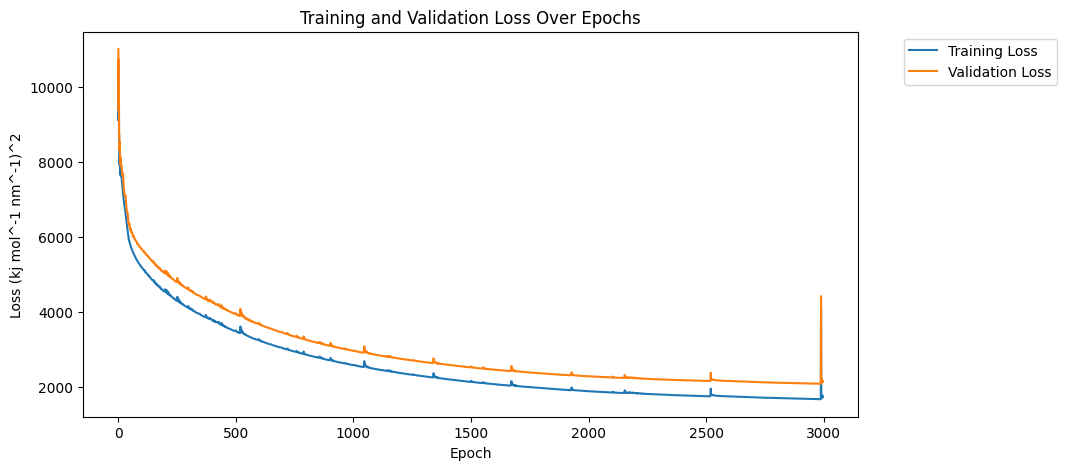

In [16]:
system.plotLosses(truncate=1)

<Figure size 1000x500 with 0 Axes>

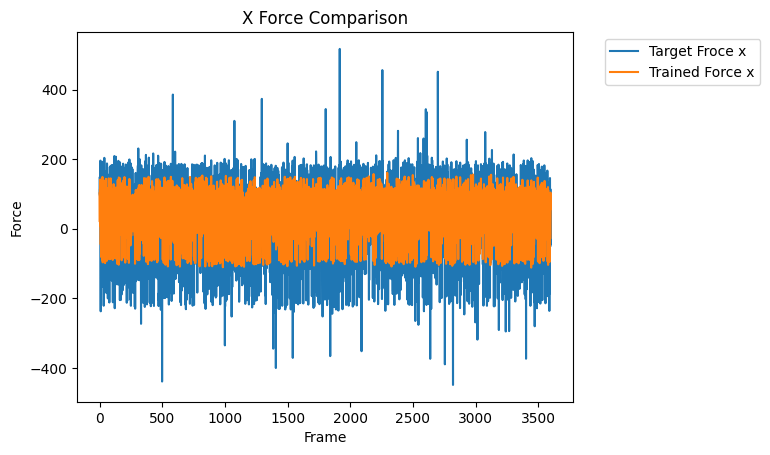

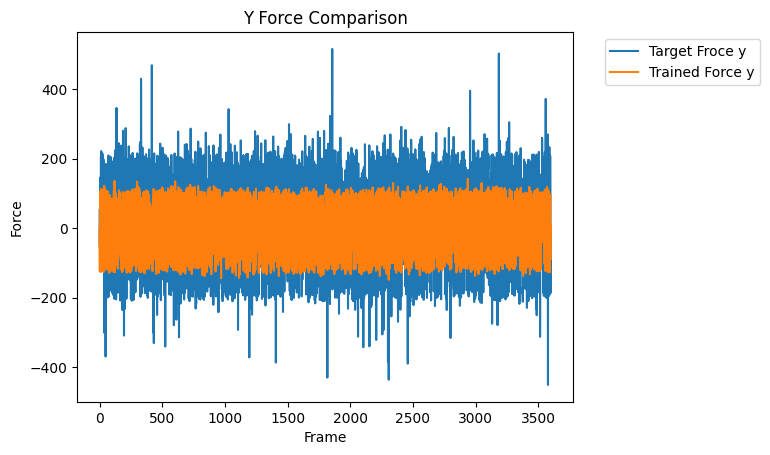

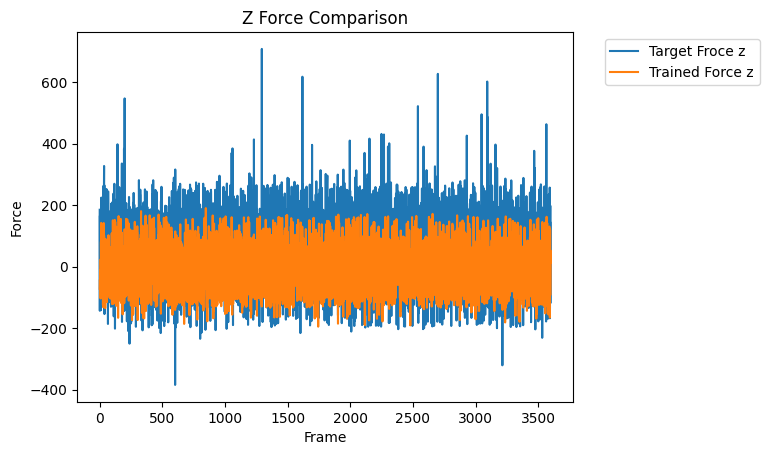

In [17]:
system.plotInitialForceGuess()

<Figure size 1000x500 with 0 Axes>

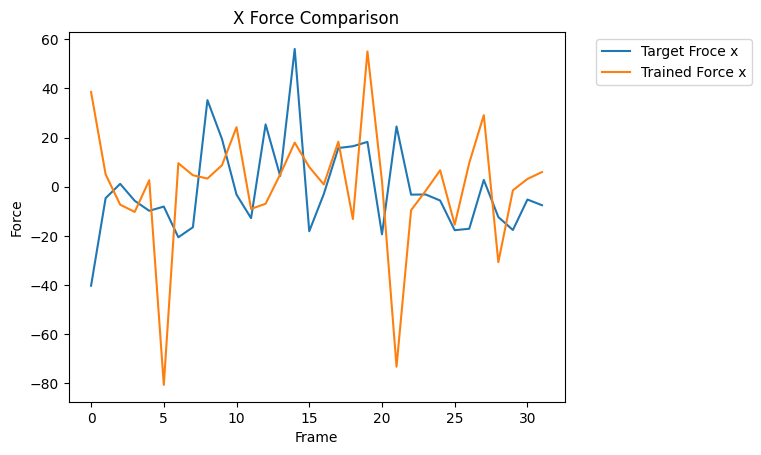

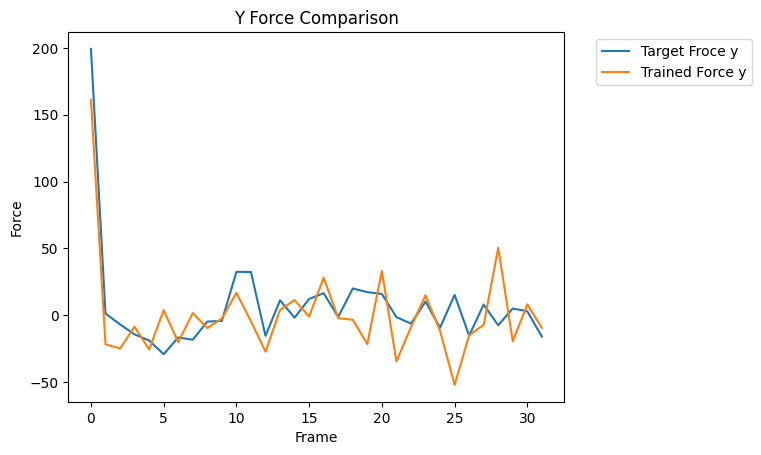

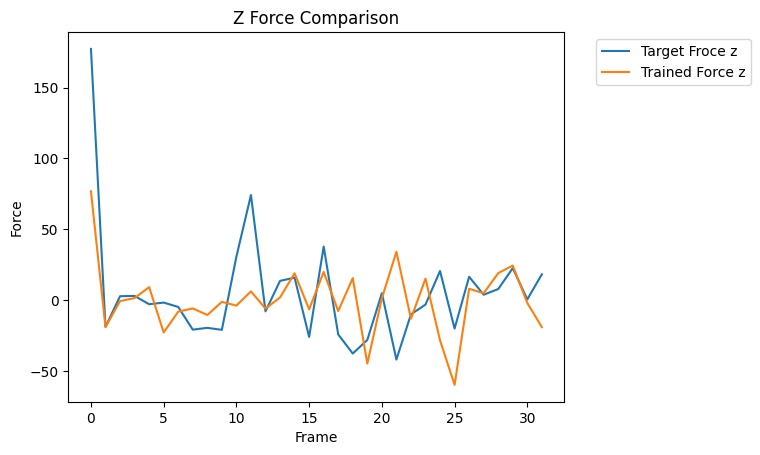

In [21]:
system.plotForceMathingByFrame(frame=300)

<Figure size 1000x500 with 0 Axes>

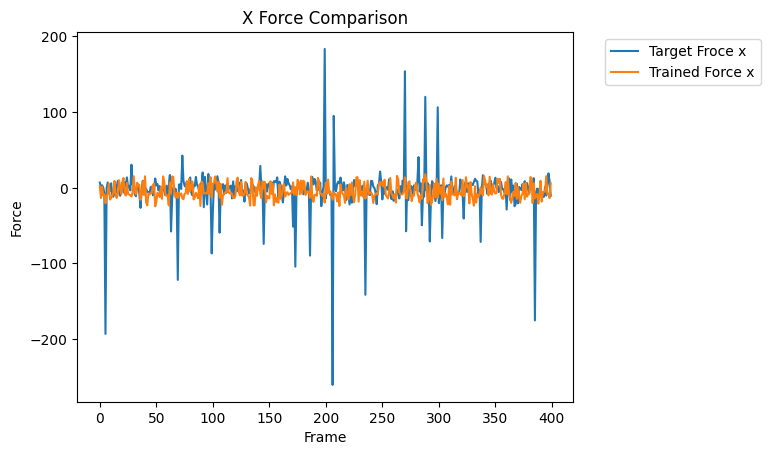

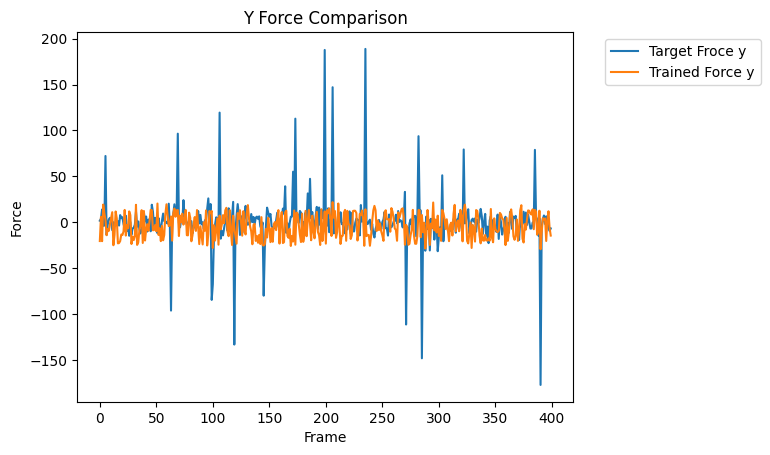

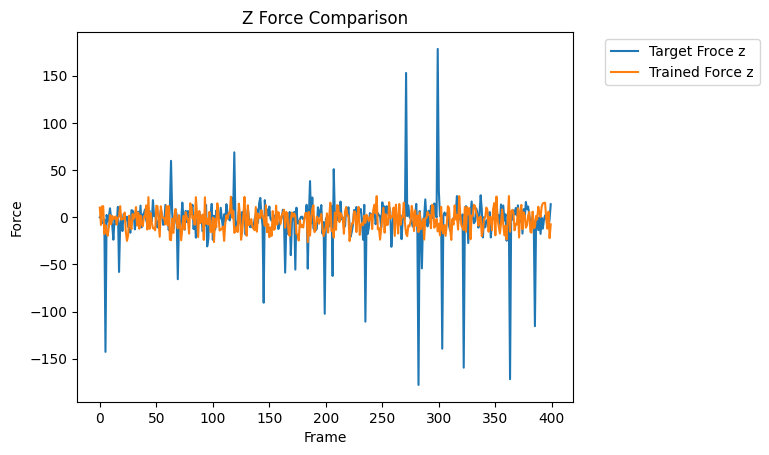

In [20]:
system.plotValForceMathing(bead_index=2)

In [19]:
system.state_dict()

OrderedDict([('potential.dispertion_const',
              tensor([ 2.6718,  1.9058,  1.9822,  2.0064,  1.4092,  4.5866, 14.0978,  8.7905,
                      14.7650,  4.6939,  6.8326,  1.8877,  1.8894,  1.9351,  1.9820,  1.9985,
                       1.9952,  1.9093,  1.8664,  1.8807,  3.6338,  1.8889,  2.7813,  5.9499,
                       1.9205,  1.8719,  1.8791,  1.8496,  1.9284,  3.1960,  2.0054,  1.8626,
                       3.6887,  2.8215,  1.6569,  4.5027,  3.0108,  5.6440,  8.2571,  1.8661,
                       9.2077, 10.7662,  2.0173, 13.1528,  8.1516,  5.3511,  9.5739,  8.8716,
                       6.3921,  1.9141,  2.4633,  6.0435,  1.8083,  1.8029,  1.8334,  1.8541,
                       1.8805,  3.5798,  1.8884,  1.9497,  1.8696, 12.1328,  1.8480,  4.0068,
                      10.7736,  1.8642,  1.8733,  1.8893, 11.9668, 12.0401,  3.8046,  1.9173,
                       1.8987, 10.0457,  8.7257,  1.9361, 14.1004,  0.1939,  1.9134,  0.2132,
                